In [6]:
library(rethinking) 
data(Howell1) 
d <- Howell1 
d$age <- (d$age - mean(d$age))/sd(d$age)
set.seed( 1000 )
i <- sample(1:nrow(d),size=nrow(d)/2)
d1 <- d[ i , ]
d2 <- d[ -i , ]

In [7]:
#6.31 Fit 6 models. Where each model adds a parameter and raise xi from 1 to 6th power.

In [12]:
Model.1 <- map( 
    alist( 
        height ~ dnorm( mu , sigma ),
        mu <- a + b1 * age ,
        a ~ dnorm( 4 , 100 ) ,
        b1 ~ dnorm( 0 , 10 ) ,       
        sigma ~ dunif( 0 , 50 ) ) ,
    data=d1 )

In [14]:
Model.2 <- map( 
    alist( 
        height ~ dnorm( mu , sigma ),
        mu <- a + b1 * age + b2 * age**2 ,
        a ~ dnorm( 4 , 100 ) ,
        b1 ~ dnorm( 0 , 10 ) , 
        b2 ~ dnorm( 0 , 10 ) ,
        sigma ~ dunif( 0 , 50 ) ) ,
    data=d1 )

In [16]:
Model.3 <- map( 
    alist( 
        height ~ dnorm( mu , sigma ),
        mu <- a + b1 * age + b2 * age**2 + b3 * age**3,
        a ~ dnorm( 4 , 100 ) ,
        b1 ~ dnorm( 0 , 10 ) , 
        b2 ~ dnorm( 0 , 10 ) ,
        b3 ~ dnorm( 0 , 10 ) ,
        sigma ~ dunif( 0 , 50 ) ) ,
    data=d1 )

In [17]:
Model.4 <- map( 
    alist( 
        height ~ dnorm( mu , sigma ),
        mu <- a + b1 * age + b2 * age**2 + b3 * age**3 + b4 * age**4,
        a ~ dnorm( 4 , 100 ) ,
        b1 ~ dnorm( 0 , 10 ) , 
        b2 ~ dnorm( 0 , 10 ) ,
        b3 ~ dnorm( 0 , 10 ) ,
        b4 ~ dnorm( 0 , 10 ) ,
        sigma ~ dunif( 0 , 50 ) ) ,
    data=d1 )

In [18]:
Model.5 <- map( 
    alist( 
        height ~ dnorm( mu , sigma ),
        mu <- a + b1 * age + b2 * age**2 + b3 * age**3 + b4 * age**4 + b5 * age**5,
        a ~ dnorm( 4 , 100 ) ,
        b1 ~ dnorm( 0 , 10 ) , 
        b2 ~ dnorm( 0 , 10 ) ,
        b3 ~ dnorm( 0 , 10 ) ,
        b4 ~ dnorm( 0 , 10 ) ,
        b5 ~ dnorm( 0 , 10 ) ,
        sigma ~ dunif( 0 , 50 ) ) ,
    data=d1 )

In [19]:
Model.6 <- map( 
    alist( 
        height ~ dnorm( mu , sigma ),
        mu <- a + b1 * age + b2 * age**2 + b3 * age**3 + b4 * age**4 + b5 * age**5 + b6 * age**6,
        a ~ dnorm( 4 , 100 ) ,
        b1 ~ dnorm( 0 , 10 ) , 
        b2 ~ dnorm( 0 , 10 ) ,
        b3 ~ dnorm( 0 , 10 ) ,
        b4 ~ dnorm( 0 , 10 ) ,
        b5 ~ dnorm( 0 , 10 ) ,
        b6 ~ dnorm( 0 , 10 ) ,
        sigma ~ dunif( 0 , 50 ) ) ,
    data=d1 )

In [13]:
Model.1


Maximum a posteriori (MAP) model fit

Formula:
height ~ dnorm(mu, sigma)
mu <- a + b1 * age
a ~ dnorm(4, 100)
b1 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
        a        b1     sigma 
138.42585  18.38827  19.54166 

Log-likelihood: -1194.49 

In [15]:
Model.2


Maximum a posteriori (MAP) model fit

Formula:
height ~ dnorm(mu, sigma)
mu <- a + b1 * age + b2 * age^2
a ~ dnorm(4, 100)
b1 ~ dnorm(0, 10)
b2 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
        a        b1        b2     sigma 
152.24267  25.57694 -13.97205  12.37944 

Log-likelihood: -1070.31 

In [20]:
#6H1. Compare WAIC for all models
compare(Model.1,Model.2,Model.3,Model.4,Model.5,Model.6)

          WAIC pWAIC dWAIC weight    SE   dSE
Model.4 1926.0   5.6   0.0   0.57 25.44    NA
Model.5 1927.5   6.3   1.5   0.27 25.39  0.37
Model.6 1928.5   7.4   2.5   0.16 25.19  1.66
Model.3 1952.3   5.4  26.3   0.00 24.21 11.01
Model.2 2149.8   5.0 223.8   0.00 22.71 26.67
Model.1 2395.4   3.4 469.4   0.00 23.14 31.02

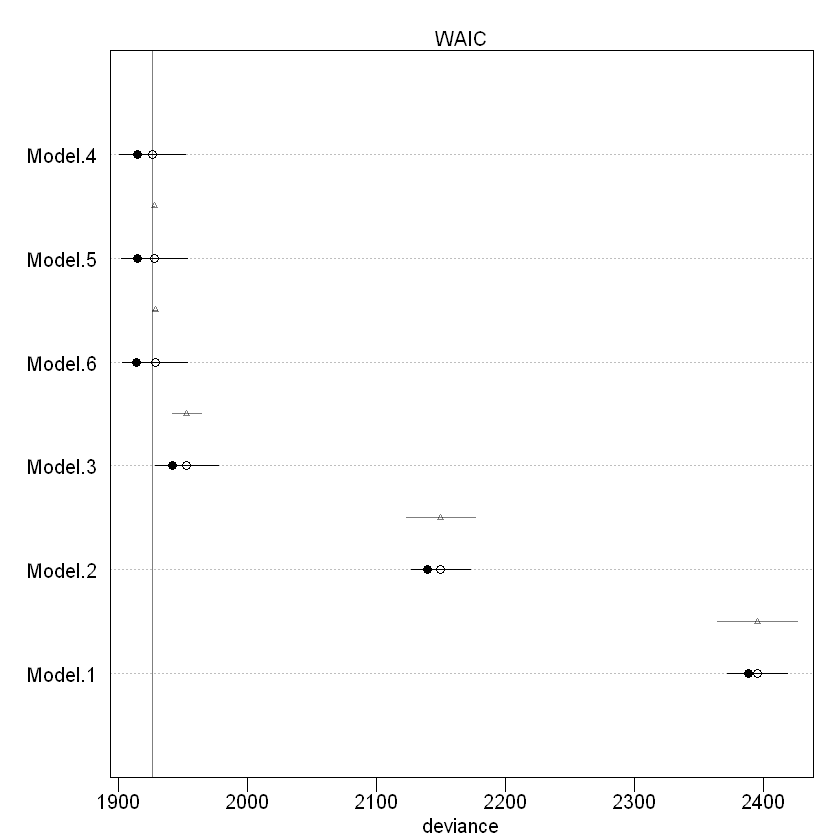

In [21]:
plot(compare(Model.1,Model.2,Model.3,Model.4,Model.5,Model.6))

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]


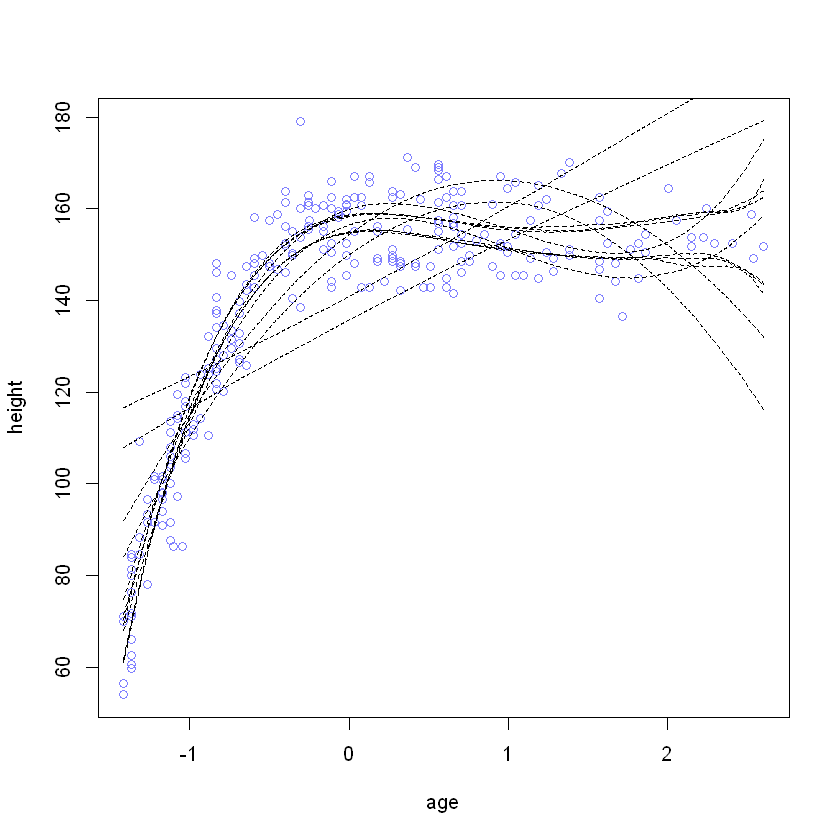

In [53]:
age.seq<-seq(from=min(d1$age),to=max(d1$age), length.out= 1e3)
pred.m4 <- link( Model.4 , data=data.frame(age=age.seq) )
pred.m5 <- link( Model.5 , data=data.frame(age=age.seq) )
pred.m6 <- link( Model.6 , data=data.frame(age=age.seq) )
pred.m3 <- link( Model.3 , data=data.frame(age=age.seq) )
pred.m2 <- link( Model.2 , data=data.frame(age=age.seq) )
pred.m1 <- link( Model.1 , data=data.frame(age=age.seq) )


# #Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
# sim.weight <- sim( area.Model , data=data.frame(area.s=area.seq),   n=1e4  )
#mu <- apply( pred.m4 , 2 , mean )
mu4.PI <- apply( pred.m4 , 2 , PI, prob=0.97)
mu5.PI <- apply( pred.m5 , 2 , PI, prob=0.97)
mu6.PI <- apply( pred.m6 , 2 , PI, prob=0.97)
mu3.PI <- apply( pred.m3 , 2 , PI, prob=0.97)
mu2.PI <- apply( pred.m2 , 2 , PI, prob=0.97)
mu1.PI <- apply( pred.m1 , 2 , PI, prob=0.97)


# plot it all
plot( height ~ age , d1 , col=rangi2 )
#lines( age.seq , mu , lty=2 )
lines( age.seq , mu4.PI[1,] , lty=2 )
lines( age.seq , mu4.PI[2,] , lty=2 )
lines( age.seq , mu5.PI[1,] , lty=2 )
lines( age.seq , mu5.PI[2,] , lty=2 )
lines( age.seq , mu6.PI[1,] , lty=2 )
lines( age.seq , mu6.PI[2,] , lty=2 )
lines( age.seq , mu3.PI[1,] , lty=2 )
lines( age.seq , mu3.PI[2,] , lty=2 )
lines( age.seq , mu2.PI[1,] , lty=2 )
lines( age.seq , mu2.PI[2,] , lty=2 )
lines( age.seq , mu1.PI[1,] , lty=2 )
lines( age.seq , mu1.PI[2,] , lty=2 )

[ 10000 / 10000 ]
[ 10000 / 10000 ]
[ 10000 / 10000 ]
[ 10000 / 10000 ]
[ 10000 / 10000 ]
[ 10000 / 10000 ]


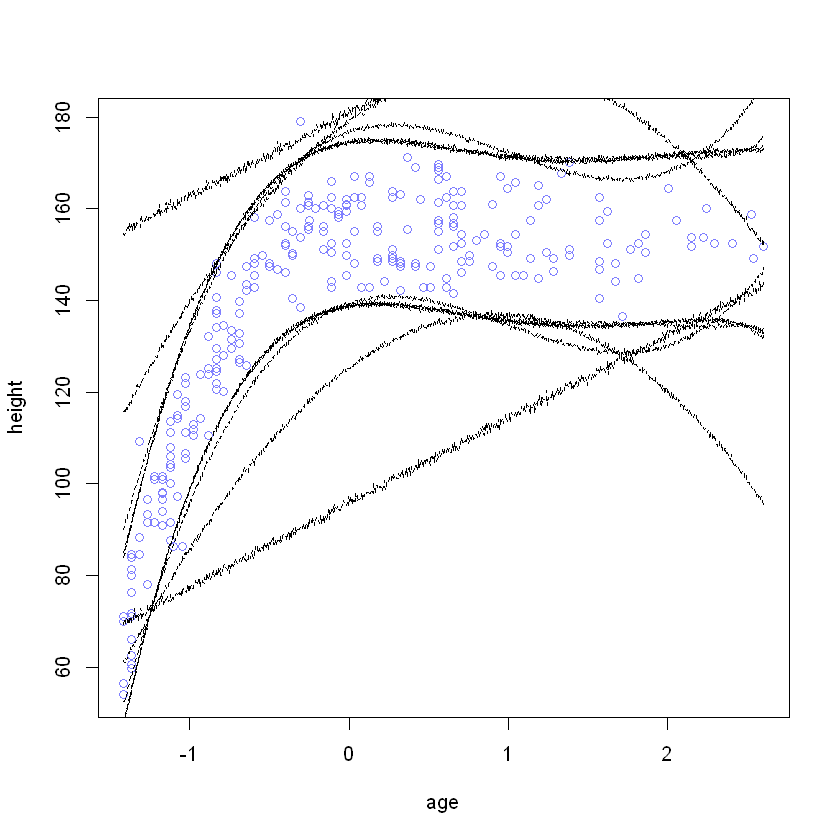

In [52]:
age.seq<-seq(from=min(d1$age),to=max(d1$age), length.out= 1e3)


sim.m4 <- sim( Model.4 , data=data.frame(age=age.seq),   n=1e4  )
sim.m5 <- sim( Model.5 , data=data.frame(age=age.seq),   n=1e4  )
sim.m6 <- sim( Model.6 , data=data.frame(age=age.seq),   n=1e4  )
sim.m3 <- sim( Model.3 , data=data.frame(age=age.seq),   n=1e4  )
sim.m2 <- sim( Model.2 , data=data.frame(age=age.seq),   n=1e4  )
sim.m1 <- sim( Model.1 , data=data.frame(age=age.seq),   n=1e4  )


# #Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
# sim.weight <- sim( area.Model , data=data.frame(area.s=area.seq),   n=1e4  )
#mu <- apply( pred.m4 , 2 , mean )
mu4.sim.PI <- apply( sim.m4 , 2 , PI, prob=0.97)
mu5.sim.PI <- apply( sim.m5 , 2 , PI, prob=0.97)
mu6.sim.PI <- apply( sim.m6 , 2 , PI, prob=0.97)
mu3.sim.PI <- apply( sim.m3 , 2 , PI, prob=0.97)
mu2.sim.PI <- apply( sim.m2 , 2 , PI, prob=0.97)
mu1.sim.PI <- apply( sim.m1 , 2 , PI, prob=0.97)


# plot it all
plot( height ~ age , d1 , col=rangi2 )
#lines( age.seq , mu , lty=2 )
lines( age.seq , mu4.sim.PI[1,] , lty=2 )
lines( age.seq , mu4.sim.PI[2,] , lty=2 )
lines( age.seq , mu5.sim.PI[1,] , lty=2 )
lines( age.seq , mu5.sim.PI[2,] , lty=2 )
lines( age.seq , mu6.sim.PI[1,] , lty=2 )
lines( age.seq , mu6.sim.PI[2,] , lty=2 )
lines( age.seq , mu3.sim.PI[1,] , lty=2 )
lines( age.seq , mu3.sim.PI[2,] , lty=2 )
lines( age.seq , mu2.sim.PI[1,] , lty=2 )
lines( age.seq , mu2.sim.PI[2,] , lty=2 )
lines( age.seq , mu1.sim.PI[1,] , lty=2 )
lines( age.seq , mu1.sim.PI[2,] , lty=2 )

In [66]:
compare(Model.1,Model.2,Model.3,Model.4,Model.5,Model.6)

          WAIC pWAIC dWAIC weight    SE   dSE
Model.4 1925.9   5.5   0.0   0.62 25.40    NA
Model.5 1928.0   6.5   2.1   0.22 25.52  0.46
Model.6 1928.6   7.5   2.6   0.16 25.24  1.79
Model.3 1952.9   5.7  27.0   0.00 24.35 11.15
Model.2 2150.4   5.4 224.5   0.00 22.77 26.85
Model.1 2395.3   3.3 469.4   0.00 23.11 31.08

In [100]:
-2*sum( dnorm( d2$height , mean = coef(Model.4)['a']
              +coef(Model.4)['b1']*d2$age 
              +coef(Model.4)['b2']*d2$age**2
              +coef(Model.4)['b3']*d2$age**3
              +coef(Model.4)['b4']*d2$age**4              
              , coef(Model.4)['sigma'] , log=TRUE ) )
WAIC(Model.4)

[1] 1876.243

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 1926.174
attr(,"lppd")
[1] -957.4326
attr(,"pWAIC")
[1] 5.654463
attr(,"se")
[1] 25.37425

In [99]:
-2*sum( dnorm( d2$height , mean = coef(Model.5)['a']
              +coef(Model.5)['b1']*d2$age 
              +coef(Model.5)['b2']*d2$age**2
              +coef(Model.5)['b3']*d2$age**3
              +coef(Model.5)['b4']*d2$age**4  
              +coef(Model.5)['b5']*d2$age**5              
              , coef(Model.5)['sigma'] , log=TRUE ) )
WAIC(Model.5)

[1] 1876.576

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 1927.878
attr(,"lppd")
[1] -957.4485
attr(,"pWAIC")
[1] 6.490388
attr(,"se")
[1] 25.49619

In [98]:
-2*sum( dnorm( d2$height , mean = coef(Model.6)['a']
              +coef(Model.6)['b1']*d2$age 
              +coef(Model.6)['b2']*d2$age**2
              +coef(Model.6)['b3']*d2$age**3
              +coef(Model.6)['b4']*d2$age**4  
              +coef(Model.6)['b5']*d2$age**5              
              +coef(Model.6)['b6']*d2$age**6
              , coef(Model.6)['sigma'] , log=TRUE ) )
WAIC(Model.6)

[1] 1875.824

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 1928.162
attr(,"lppd")
[1] -956.7909
attr(,"pWAIC")
[1] 7.289832
attr(,"se")
[1] 25.26358

In [97]:
-2*sum( dnorm( d2$height , mean = coef(Model.3)['a']
              +coef(Model.3)['b1']*d2$age 
              +coef(Model.3)['b2']*d2$age**2
              +coef(Model.3)['b3']*d2$age**3            
              , coef(Model.3)['sigma'] , log=TRUE ) )
WAIC(Model.3)

[1] 1932.36

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 1953.044
attr(,"lppd")
[1] -970.7238
attr(,"pWAIC")
[1] 5.798389
attr(,"se")
[1] 24.36996

In [96]:
-2*sum( dnorm( d2$height , mean = coef(Model.2)['a']
              +coef(Model.2)['b1']*d2$age 
              +coef(Model.2)['b2']*d2$age**2           
              , coef(Model.2)['sigma'] , log=TRUE ) )
WAIC(Model.2)

[1] 2138.08

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 2149.941
attr(,"lppd")
[1] -1069.813
attr(,"pWAIC")
[1] 5.158181
attr(,"se")
[1] 22.73771

In [95]:
-2*sum( dnorm( d2$height , mean = coef(Model.1)['a']
              +coef(Model.1)['b1']*d2$age          
              , coef(Model.1)['sigma'] , log=TRUE ) )
WAIC(Model.1)

[1] 2422.299

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 2395.618
attr(,"lppd")
[1] -1194.327
attr(,"pWAIC")
[1] 3.481565
attr(,"se")
[1] 23.18434

In [111]:
Model.6.H.6 <- map( 
    alist( 
        height ~ dnorm( mu , sigma ),
        mu <- a + b1 * age + b2 * age**2 + b3 * age**3 + b4 * age**4 + b5 * age**5 + b6 * age**6,
        a ~ dnorm( 0 , 50 ) ,
        b1 ~ dnorm( 0 , 5 ) , 
        b2 ~ dnorm( 0 , 5 ) ,
        b3 ~ dnorm( 0 , 5 ) ,
        b4 ~ dnorm( 0 , 5 ) ,
        b5 ~ dnorm( 0 , 5 ) ,
        b6 ~ dnorm( 0 , 5 ) ,
        sigma ~ dunif( 0 , 50 )
    ) ,
    data=d1, start=list( b1=0, b2=0
                       , b3=0
                       , b4=0
                       , b5=0
                       , b6=0)  )

In [112]:
Model.6.H.6


Maximum a posteriori (MAP) model fit

Formula:
height ~ dnorm(mu, sigma)
mu <- a + b1 * age + b2 * age^2 + b3 * age^3 + b4 * age^4 + b5 * 
    age^5 + b6 * age^6
a ~ dnorm(0, 50)
b1 ~ dnorm(0, 5)
b2 ~ dnorm(0, 5)
b3 ~ dnorm(0, 5)
b4 ~ dnorm(0, 5)
b5 ~ dnorm(0, 5)
b6 ~ dnorm(0, 5)
sigma ~ dunif(0, 50)

MAP values:
          b1           b2           b3           b4           b5           b6 
  5.97213674 -16.52226267  12.08415222  -3.54117998   0.23875376   0.05161847 
           a        sigma 
155.80853048   8.19986307 

Log-likelihood: -958.26 

In [ ]:
plot the implied predictions
compute the out-of-sample deviance using d2
How does this model, using regularizing priors, compare the best WAIC model from earlier?

How do you interpret this result?


[ 1000 / 1000 ]
[ 1000 / 1000 ]


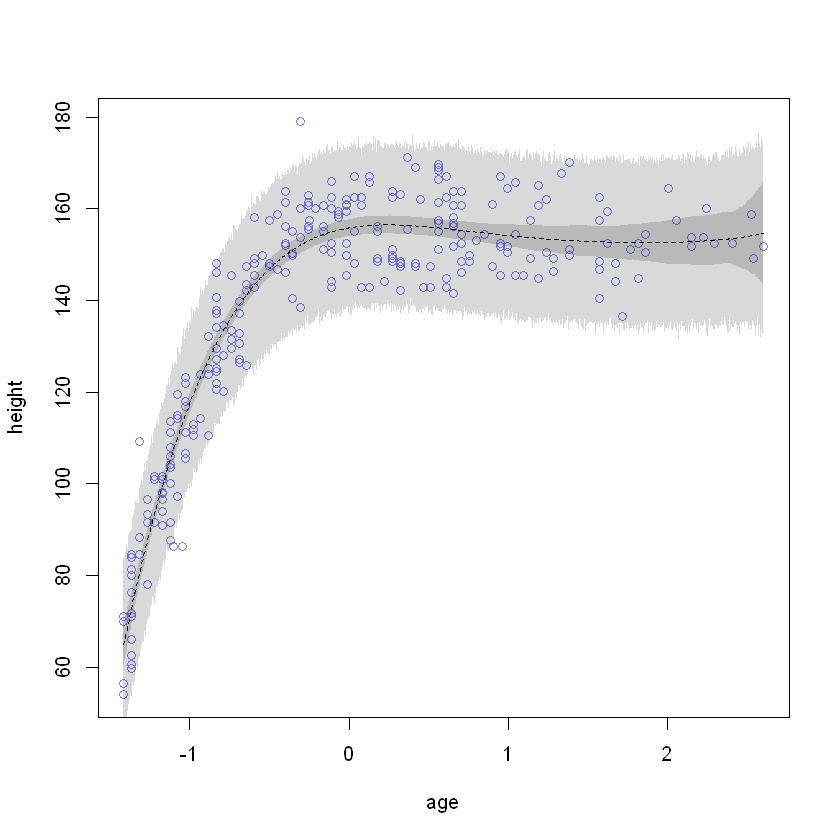

In [116]:
age.seq<-seq(from=min(d1$age),to=max(d1$age), length.out= 1e3)
d.predict <- list(
    height = rep(0,1e3), # empty outcome
    age = age.seq
)

pred.m6H6 <- link( Model.6.H.6 , data=d.predict )
mu.m6H6 <- apply( pred.m6H6 , 2 , mean )
mu.PI.6h6 <- apply( pred.m6H6 , 2 , PI, prob=0.97)
pred.sim.m6H6 <- sim( Model.6.H.6 , data=d.predict )
sim.pi.6h6 <- apply( pred.sim.m6H6 , 2 , PI, prob=0.97 )

# plot it all
plot( height ~ age , d1 , col=rangi2 )
lines( age.seq , mu.m6H6 , lty=2 )
shade( mu.PI.6h6 , age.seq )
shade( sim.pi.6h6 , age.seq )

In [121]:
#old 6 variables
-2*sum( dnorm( d2$height , mean = coef(Model.6)['a']
              +coef(Model.6)['b1']*d2$age 
              +coef(Model.6)['b2']*d2$age**2
              +coef(Model.6)['b3']*d2$age**3
              +coef(Model.6)['b4']*d2$age**4  
              +coef(Model.6)['b5']*d2$age**5              
              +coef(Model.6)['b6']*d2$age**6
              , coef(Model.6)['sigma'] , log=TRUE ) )
WAIC(Model.6)

[1] 1875.824

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 1928.274
attr(,"lppd")
[1] -956.8014
attr(,"pWAIC")
[1] 7.335738
attr(,"se")
[1] 25.33034

In [117]:
#new flat priors 6 variables
-2*sum( dnorm( d2$height , mean = coef(Model.6.H.6)['a']
              +coef(Model.6.H.6)['b1']*d2$age
              +coef(Model.6.H.6)['b2']*d2$age**2
              +coef(Model.6.H.6)['b3']*d2$age**3
              +coef(Model.6.H.6)['b4']*d2$age**4 
              +coef(Model.6.H.6)['b5']*d2$age**5             
              +coef(Model.6.H.6)['b6']*d2$age**6
              , coef(Model.6.H.6)['sigma'] , log=TRUE ) )
WAIC(Model.6.H.6)

[1] 1875.584

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 1930.69
attr(,"lppd")
[1] -958.7622
attr(,"pWAIC")
[1] 6.582985
attr(,"se")
[1] 25.46797

In [119]:
# Best model performance
-2*sum( dnorm( d2$height , mean = coef(Model.4)['a']
              +coef(Model.4)['b1']*d2$age 
              +coef(Model.4)['b2']*d2$age**2
              +coef(Model.4)['b3']*d2$age**3
              +coef(Model.4)['b4']*d2$age**4              
              , coef(Model.4)['sigma'] , log=TRUE ) )
WAIC(Model.4)

[1] 1876.243

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 1925.843
attr(,"lppd")
[1] -957.4286
attr(,"pWAIC")
[1] 5.492656
attr(,"se")
[1] 25.3267